# Part 1: 데이터 탐색 및 시각화

In [1]:
# matplotlib 한글 깨짐 잡아주는 방법 
# https://pinkwink.kr/1255
import matplotlib as mpl
import matplotlib.pyplot as plt
 
%config InlineBackend.figure_format = 'retina'
 
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.


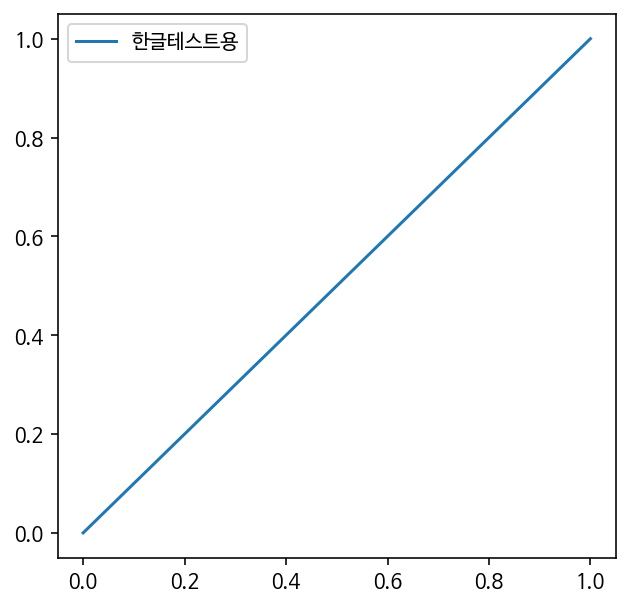

In [2]:
plt.figure(figsize=(5,5))
plt.plot([0,1], [0,1], label='한글테스트용')
plt.legend()
plt.show()

In [3]:
from google.colab import files
import pandas as pd 
import numpy as np 

## 1. 각 연료의 연도별 추세 및 비율 확인 

In [4]:
yearly_df_dongjak = pd.read_csv('/content/drive/My Drive/Colab Notebooks/시각화_및_모델링/동작구_연도별_연료변화_데이터.csv')
yearly_df_seoul = pd.read_csv('/content/drive/My Drive/Colab Notebooks/시각화_및_모델링/서울시_연도별_연료변화_데이터.csv')

In [5]:
yearly_df_seoul

,Unnamed: 0,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,0,2015,1602528,1066199,338455,9992,33927,1151,1,4335
1,1,2016,1596819,1107727,317469,9854,44875,1498,12,4753
2,2,2017,1600270,1135239,301546,9731,59431,4797,13,5229
3,3,2018,1592471,1147787,284328,9635,75178,9564,84,5604
4,4,2019,1607915,1121920,271977,9441,91505,14952,599,5848


In [6]:
yearly_df_seoul = yearly_df_seoul.drop(yearly_df_seoul.columns[0], axis=1)
yearly_df_seoul

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2015,1602528,1066199,338455,9992,33927,1151,1,4335
1,2016,1596819,1107727,317469,9854,44875,1498,12,4753
2,2017,1600270,1135239,301546,9731,59431,4797,13,5229
3,2018,1592471,1147787,284328,9635,75178,9564,84,5604
4,2019,1607915,1121920,271977,9441,91505,14952,599,5848


In [7]:
yearly_df_dongjak

,Unnamed: 0,연도,휘발유,경유,엘피지,전기,하이브리드,CNG,수소,기타연료
0,0,2009,55372,26430,13620,0,71,52,0,28
1,1,2010,56099,26778,13468,0,131,65,0,38
2,2,2011,56490,27164,12748,3,287,75,0,35
3,3,2012,57497,28343,12198,4,520,88,0,39
4,4,2013,58422,30214,11718,5,704,93,0,46
5,5,2014,57801,31846,10825,6,896,102,0,60
6,6,2015,56835,33951,9994,22,1089,106,0,70
7,7,2016,57212,35867,9338,28,1549,99,0,83
8,8,2017,57126,36520,8846,73,2101,84,0,87
9,9,2018,57443,36753,8237,157,2697,79,1,109


In [8]:
yearly_df_dongjak = yearly_df_dongjak.drop(yearly_df_dongjak.columns[0], axis=1)
yearly_df_dongjak = yearly_df_dongjak[['연도', '휘발유', '경유', '엘피지', 'CNG', '하이브리드', '전기', '수소', '기타연료']]
yearly_df_dongjak

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2009,55372,26430,13620,52,71,0,0,28
1,2010,56099,26778,13468,65,131,0,0,38
2,2011,56490,27164,12748,75,287,3,0,35
3,2012,57497,28343,12198,88,520,4,0,39
4,2013,58422,30214,11718,93,704,5,0,46
5,2014,57801,31846,10825,102,896,6,0,60
6,2015,56835,33951,9994,106,1089,22,0,70
7,2016,57212,35867,9338,99,1549,28,0,83
8,2017,57126,36520,8846,84,2101,73,0,87
9,2018,57443,36753,8237,79,2697,157,1,109


In [9]:
yearly_df_dongjak_1519 = yearly_df_dongjak.iloc[6:]
yearly_df_dongjak_1519

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
6,2015,56835,33951,9994,106,1089,22,0,70
7,2016,57212,35867,9338,99,1549,28,0,83
8,2017,57126,36520,8846,84,2101,73,0,87
9,2018,57443,36753,8237,79,2697,157,1,109
10,2019,58097,36440,8076,79,3022,203,3,113


In [10]:
def plot_yearly(df, title):
  x_yr = list(df['연도'])
  y = list(df.columns)[1:]
  plt.figure(figsize=(5,5))
  for type_c in y: 
    zero_list = [] 
    col_val_l = list(df[type_c])
    for item in col_val_l:
      if item == 0: 
        zero_list.append(0)
      else: 
        zero_list.append(np.log(item)) 

    plt.scatter(x_yr, zero_list)
    plt.plot(x_yr, zero_list, label = type_c)

  plt.title(title)
  if '동작' not in title:
    plt.xticks(list(df['연도']))
  plt.xlabel("연도")
  plt.ylabel("로그\n개수", rotation = 0, labelpad=20)
  plt.xticks(np.arange(2015, 2020, 1))
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', title = '연료 종류').get_frame().set_facecolor('none')
  plt.tight_layout() 
  plt.show() 

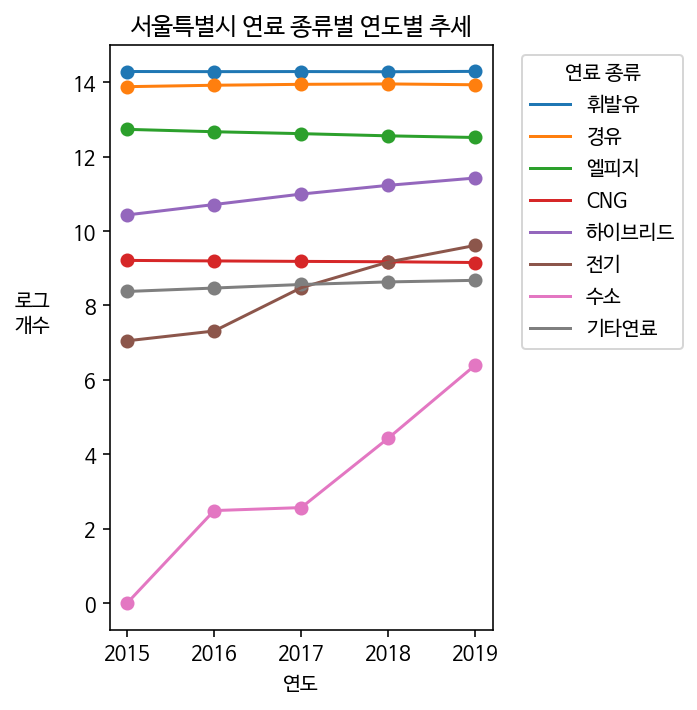

In [11]:
plot_yearly(yearly_df_seoul, '서울특별시 연료 종류별 연도별 추세')

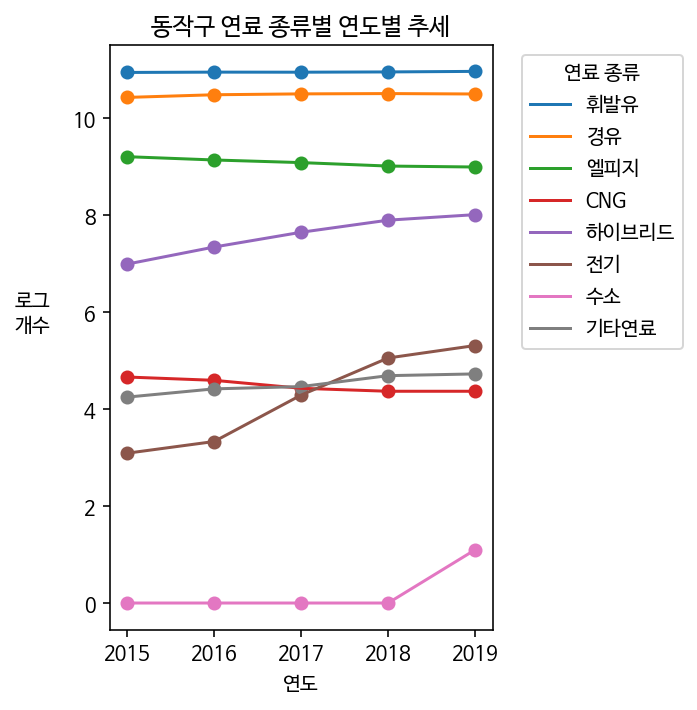

In [12]:
plot_yearly(yearly_df_dongjak_1519, '동작구 연료 종류별 연도별 추세')

In [13]:
def plot_pie1(df, year, title):
  denom = float(df[df['연도'] == year][df.columns[1:]].sum(axis=1))
  col_green = ['하이브리드', '전기', '수소']
  col_else = list(set(list(yearly_df_dongjak.columns)[1:]) - set(col_green))

  green_num = np.sum([float(df[df['연도'] == year][col_g]) for col_g in col_green])
  else_num = np.sum([float(df[df['연도'] == year][col_e]) for col_e in col_else])

  percent_list = [else_num / denom * 100, green_num / denom * 100]
  label_list = ['엔진자동차', '친환경차'] 
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(label_list, percent_list)]
  patches, text = plt.pie(percent_list, startangle=90, radius=1.2)
  plt.legend(patches, labels, loc = 'upper left', bbox_to_anchor=(1,1.))
  #plt.pie(percent_list, labels = col_list)
  plt.title(title)
  plt.tight_layout()
  plt.show()

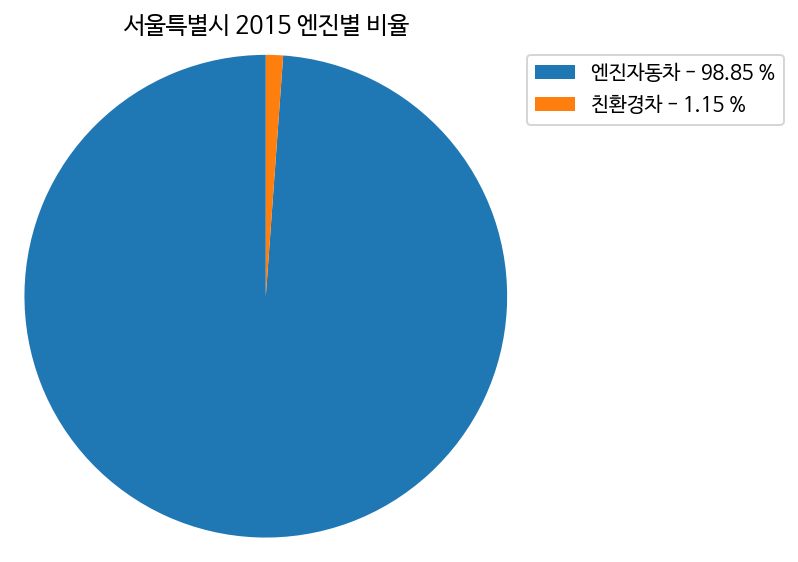

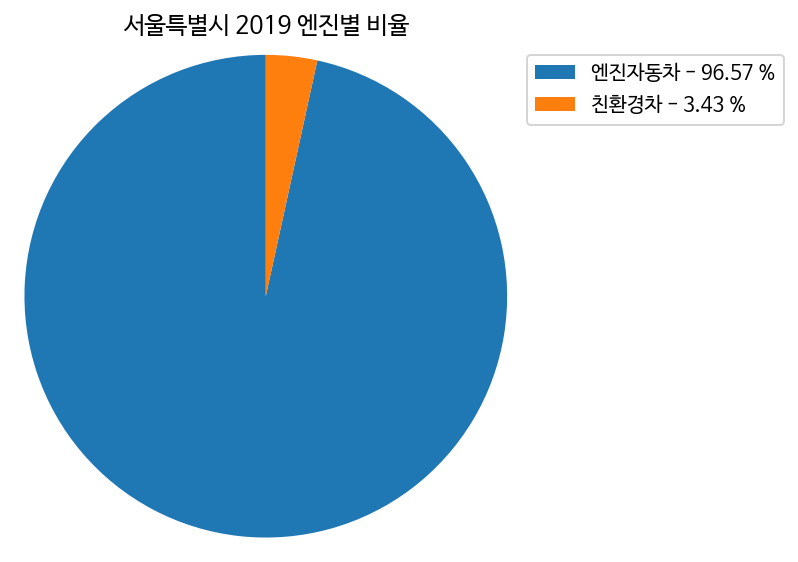

In [14]:
plot_pie1(yearly_df_seoul, 2015, '서울특별시 2015 엔진별 비율')    
plot_pie1(yearly_df_seoul, 2019, '서울특별시 2019 엔진별 비율')  

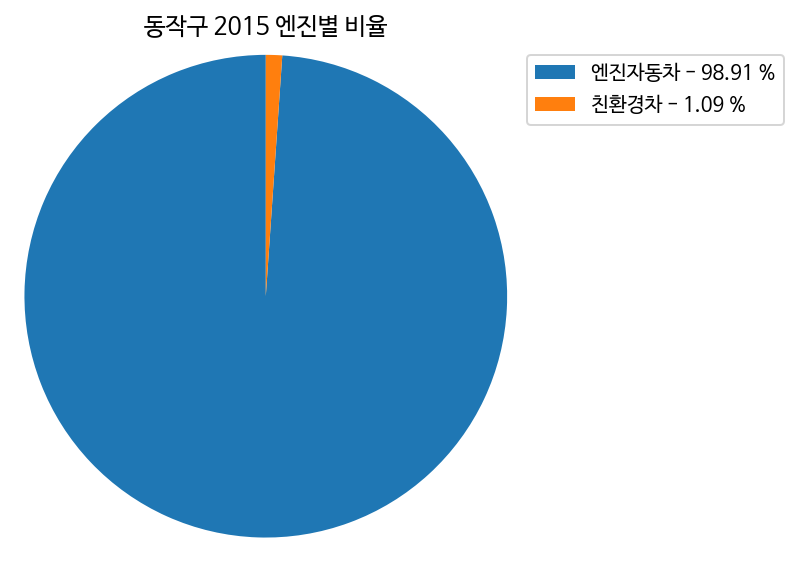

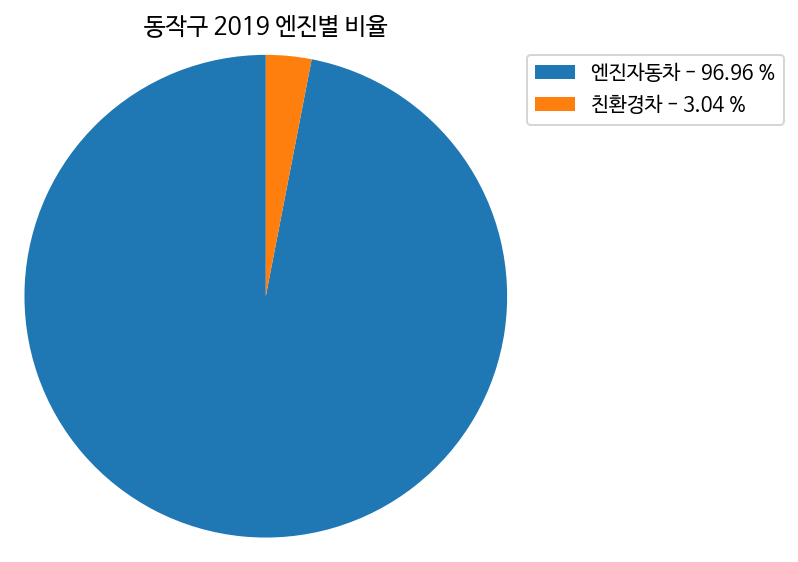

In [15]:
plot_pie1(yearly_df_dongjak, 2015, '동작구 2015 엔진별 비율')    
plot_pie1(yearly_df_dongjak, 2019, '동작구 2019 엔진별 비율')  

In [16]:
def plot_pie2(df, year, title, green):
  percent_list = [] 
  if green: 
    col_list = ['하이브리드', '전기', '수소']
    percent_list = [round(float(df[df['연도'] == year][col]) / float(df[df['연도'] == year][col_list].sum(axis=1)) * 100, 5) for col in col_list]
  else: 
    col_list = list(df.columns)[1:]
    percent_list = [round(float(df[df['연도'] == year][col]) / float(df[df['연도'] == year][col_list].sum(axis=1)) * 100, 5) for col in col_list]
  
  patches, text = plt.pie(percent_list, startangle=90, radius=1.2)
  labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(col_list, percent_list)]
  plt.legend(patches, labels, loc = 'upper left', bbox_to_anchor=(1,1.))
  #plt.pie(percent_list, labels = col_list)
  plt.title(title)
  plt.tight_layout()
  plt.show()

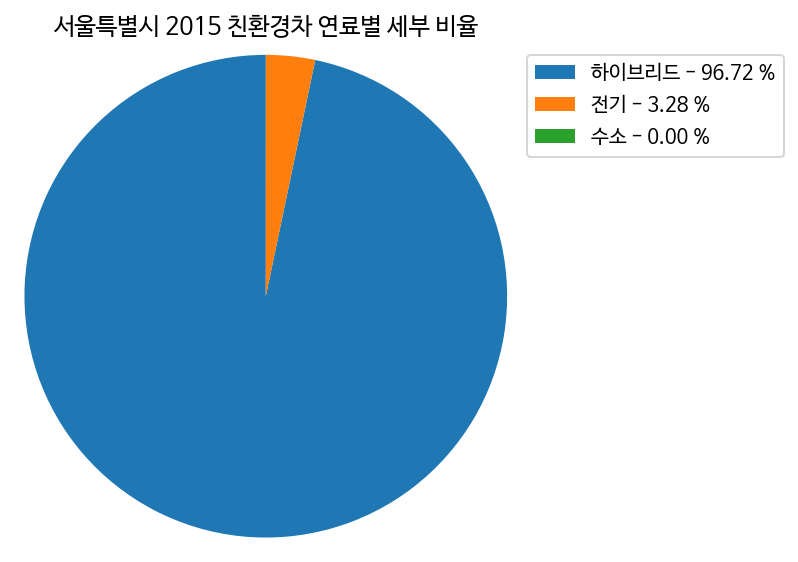

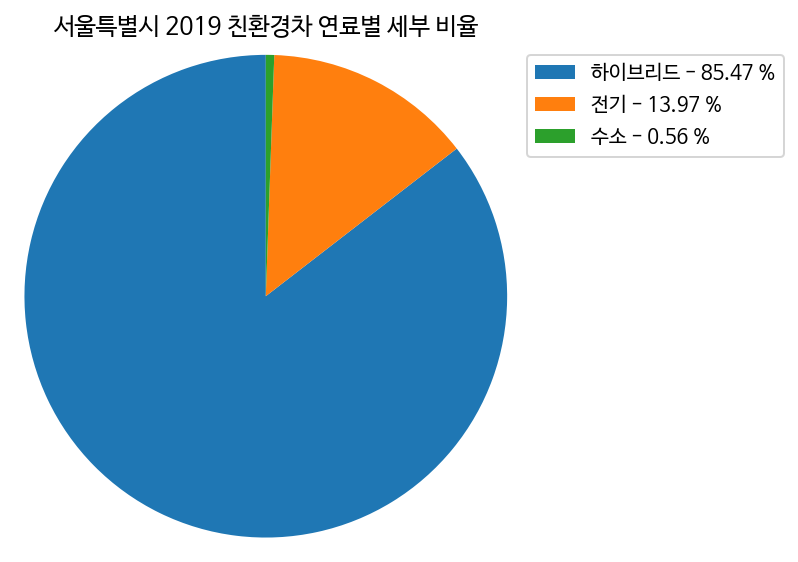

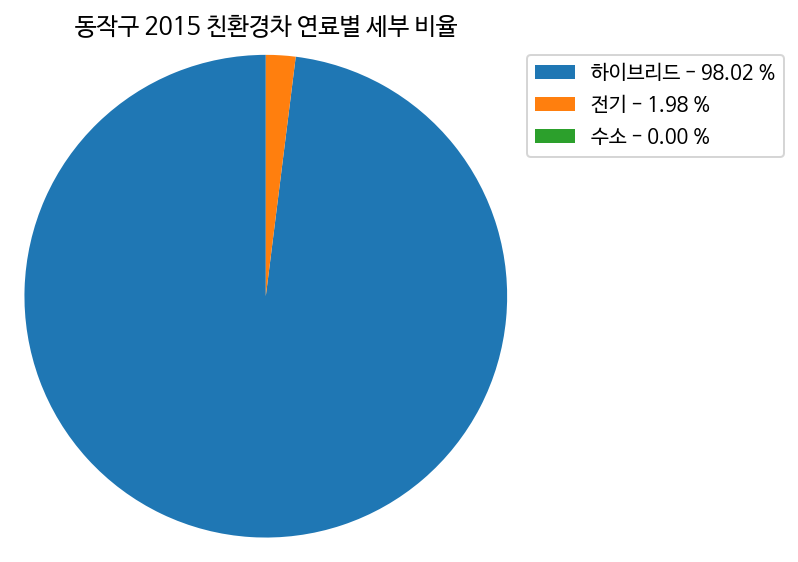

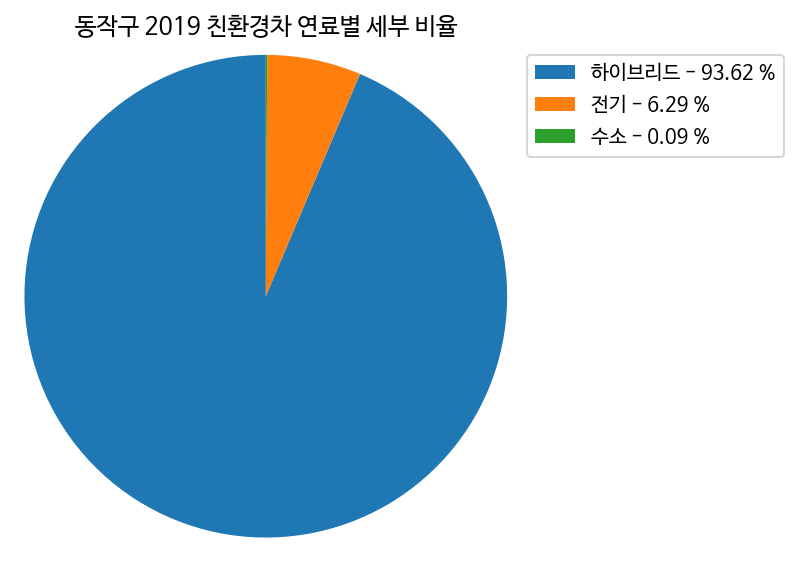

In [17]:
plot_pie2(yearly_df_seoul, 2015, '서울특별시 2015 친환경차 연료별 세부 비율', green = True)   
plot_pie2(yearly_df_seoul, 2019, '서울특별시 2019 친환경차 연료별 세부 비율', green = True)   
plot_pie2(yearly_df_dongjak, 2015, '동작구 2015 친환경차 연료별 세부 비율', green = True)   
plot_pie2(yearly_df_dongjak, 2019, '동작구 2019 친환경차 연료별 세부 비율', green = True)    

## 2. 충전기 현황 확인

In [18]:
import os 
full_charge_l_public = [] 
fast_charge_l_public = [] 
full_charge_l_private = [] 
fast_charge_l_private = [] 
for a_file in os.listdir('/content/drive/My Drive/Colab Notebooks/충전소3'):
  dong_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/충전소3/' + a_file, encoding='cp949')
  full_charge_l_public.append(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Public']['완속충전기대수']))
  fast_charge_l_public.append(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Public']['급속충전기대수']))

  full_charge_l_private.append(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Private']['완속충전기대수']))
  fast_charge_l_private.append(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Private']['급속충전기대수']))
# 공용 ~1000개 확인 (full_charge_l_public + fast_charge_l_public)
print(np.sum(full_charge_l_private))
print(np.sum(full_charge_l_public))
print(np.sum(fast_charge_l_private))
print(np.sum(fast_charge_l_public))

1631.0
683.0
561.0
323.0


In [19]:
seoul_charge_dict_full = {'full_public': np.sum(full_charge_l_public), 'full_private': np.sum(full_charge_l_private)}
seoul_charge_dict_fast = {'fast_public': np.sum(fast_charge_l_public), 'fast_private': np.sum(fast_charge_l_private)}
print(seoul_charge_dict_full)
print(seoul_charge_dict_fast)

{'full_public': 683.0, 'full_private': 1631.0}
{'fast_public': 323.0, 'fast_private': 561.0}


In [20]:
def plot_bar(dict_full, dict_fast, title, ymin, ymax, incr):
  labels = ['공용', '비공용']
  list_full = list(dict_full.values())
  list_fast = list(dict_fast.values())
  x = np.arange(len(labels))
  fig, ax = plt.subplots()
  width = 0.35 
  rects1 = ax.bar(x-width / 2, list_full, width, label = '완속')
  rects2 = ax.bar(x+width / 2, list_fast, width, label = '급속')

  ax.set_ylabel('개수', rotation = 0, labelpad=20)
  ax.set_title(title)
  ax.set_xticks(x)
  #ax.yticks(np.arange(0, 1700, 100))
  ax.set_xticklabels(labels)
  
  ax.legend() 

  def autolabel(rects):
    for rect in rects: 
      height = rect.get_height() 
      ax.annotate('{}'.format(height),
                  xy=(rect.get_x() + rect.get_width() / 2, height),
                  xytext=(0, 3),  # 3 points vertical offset
                  textcoords="offset points",
                  ha='center', va='bottom')

  autolabel(rects1)
  autolabel(rects2)
  fig.tight_layout() 
  plt.yticks(np.arange(ymin, ymax, incr))
  plt.show() 

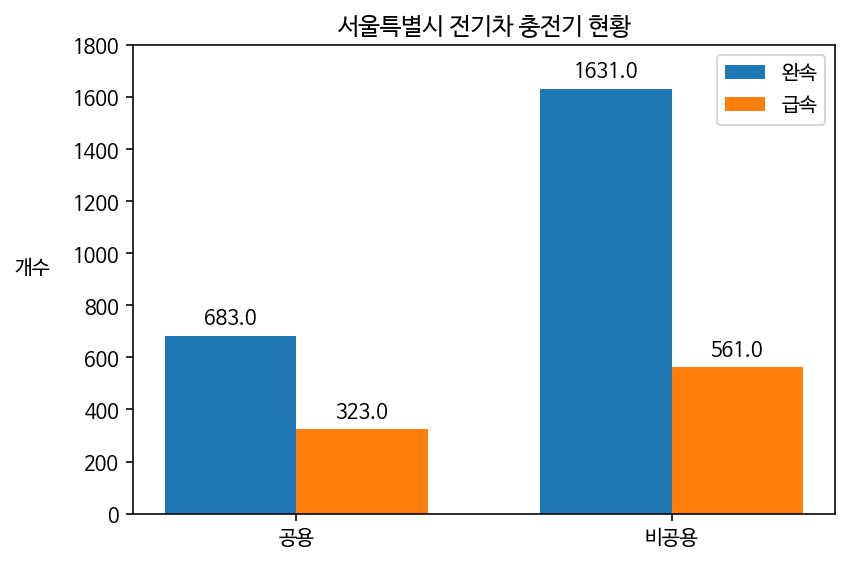

In [21]:
plot_bar(seoul_charge_dict_full, seoul_charge_dict_fast, '서울특별시 전기차 충전기 현황', 0, 2000, 200)

In [22]:
full_charge_d_public = {}
fast_charge_d_public = {} 
full_charge_d_private = {} 
fast_charge_d_private = {} 
for a_file in os.listdir('/content/drive/My Drive/Colab Notebooks/충전소4'):
  dong_csv = pd.read_csv('/content/drive/My Drive/Colab Notebooks/충전소4/' + a_file, encoding='cp949')  
  dict_key = a_file.split('_')[0]
  full_charge_d_public[dict_key] = int(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Public']['완속충전기대수']))
  fast_charge_d_public[dict_key] = int(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Public']['급속충전기대수']))
  full_charge_d_private[dict_key] = int(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Private']['완속충전기대수']))
  fast_charge_d_private[dict_key] = int(np.sum(dong_csv[dong_csv['PrivatePublic'] == 'Private']['급속충전기대수']))

print(full_charge_d_private)
print(full_charge_d_public)
print(fast_charge_d_private)
print(fast_charge_d_public)

{'강남구': 134, '강동구': 56, '강북구': 12, '금천구': 126, '관악구': 23, '광진구': 17, '노원구': 76, '도봉구': 50, '강서구': 91, '구로구': 142, '동대문구': 29, '동작구': 34, '성북구': 62, '용산구': 66, '마포구': 89, '은평구': 23, '성동구': 77, '영등포구': 71, '양천구': 39, '중랑구': 44, '송파구': 186, '중구': 23, '서초구': 100, '종로구': 36, '서대문구': 25}
{'강남구': 66, '강동구': 37, '강북구': 21, '금천구': 3, '관악구': 11, '광진구': 16, '노원구': 34, '도봉구': 19, '강서구': 36, '구로구': 17, '동대문구': 8, '동작구': 28, '성북구': 14, '용산구': 22, '마포구': 32, '은평구': 11, '성동구': 30, '영등포구': 40, '양천구': 32, '중랑구': 27, '송파구': 34, '중구': 45, '서초구': 33, '종로구': 31, '서대문구': 36}
{'강남구': 40, '강동구': 37, '강북구': 2, '금천구': 18, '관악구': 11, '광진구': 5, '노원구': 30, '도봉구': 29, '강서구': 30, '구로구': 24, '동대문구': 17, '동작구': 15, '성북구': 31, '용산구

In [23]:
import collections
d = collections.OrderedDict(sorted(full_charge_d_private.items()))
full_charge_d_private_sorted = {}
for k, v in d.items():
  full_charge_d_private_sorted[k] = v

In [24]:
d = collections.OrderedDict(sorted(full_charge_d_public.items()))
full_charge_d_public_sorted = {}
for k, v in d.items():
  full_charge_d_public_sorted[k] = v

In [25]:
d = collections.OrderedDict(sorted(fast_charge_d_private.items()))
fast_charge_d_private_sorted = {}
for k, v in d.items():
  fast_charge_d_private_sorted[k] = v

In [26]:
d = collections.OrderedDict(sorted(fast_charge_d_public.items()))
fast_charge_d_public_sorted = {}
for k, v in d.items():
  fast_charge_d_public_sorted[k] = v

In [27]:
full_charge_d_public_sorted

{'강남구': 66,
 '강동구': 37,
 '강북구': 21,
 '강서구': 36,
 '관악구': 11,
 '광진구': 16,
 '구로구': 17,
 '금천구': 3,
 '노원구': 34,
 '도봉구': 19,
 '동대문구': 8,
 '동작구': 28,
 '마포구': 32,
 '서대문구': 36,
 '서초구': 33,
 '성동구': 30,
 '성북구': 14,
 '송파구': 34,
 '양천구': 32,
 '영등포구': 40,
 '용산구': 22,
 '은평구': 11,
 '종로구': 31,
 '중구': 45,
 '중랑구': 27}

In [28]:
fast_charge_d_public_sorted

{'강남구': 26,
 '강동구': 15,
 '강북구': 8,
 '강서구': 14,
 '관악구': 8,
 '광진구': 15,
 '구로구': 11,
 '금천구': 5,
 '노원구': 10,
 '도봉구': 18,
 '동대문구': 7,
 '동작구': 5,
 '마포구': 24,
 '서대문구': 4,
 '서초구': 9,
 '성동구': 15,
 '성북구': 7,
 '송파구': 22,
 '양천구': 17,
 '영등포구': 24,
 '용산구': 12,
 '은평구': 18,
 '종로구': 9,
 '중구': 14,
 '중랑구': 6}

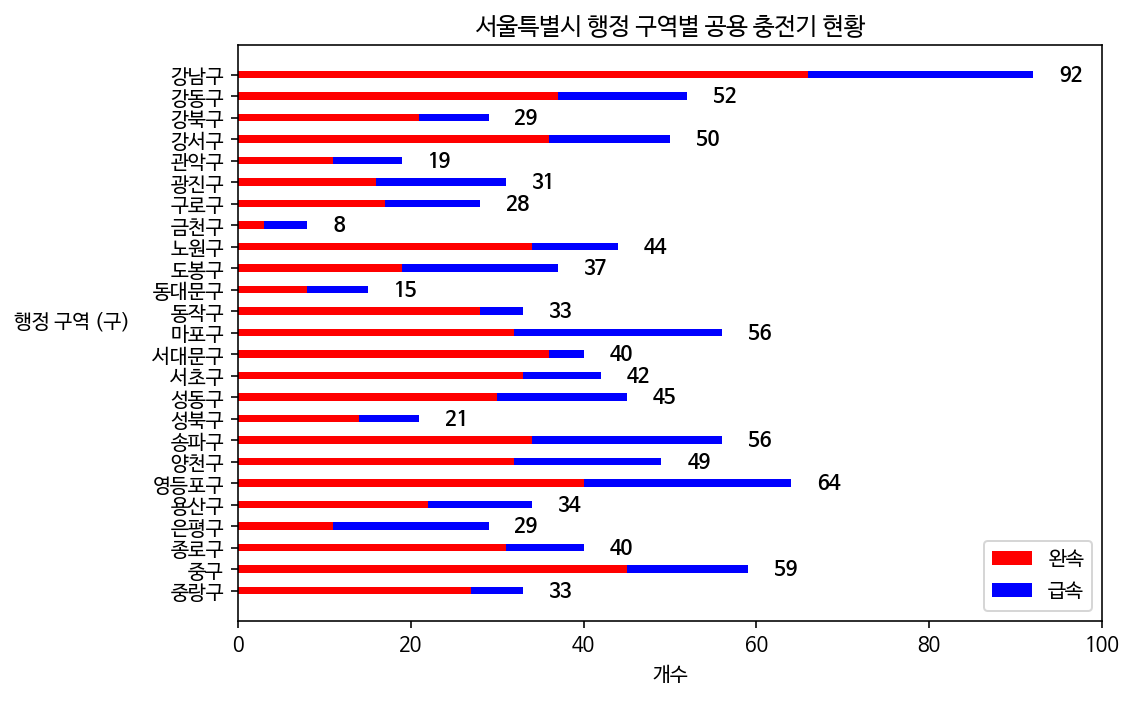

In [29]:
N = 25
menMeans = list(full_charge_d_public_sorted.values())
womenMeans = list(fast_charge_d_public_sorted.values())
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.barh(ind, menMeans, width, color='r')
plt.barh(ind, womenMeans, width, left=menMeans, color='b')
plt.yticks(ind, ('강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구'))
plt.xlabel('개수')
plt.ylabel('행정 구역 (구)', rotation = 0, labelpad=40)
plt.xticks(np.arange(0, 110, 20))
plt.title('서울특별시 행정 구역별 공용 충전기 현황')
ax.invert_yaxis()
ax.legend(labels=['완속', '급속'])

rects = ax.patches 
dd = [] 
for rect in rects: 
  dd.append(rect.get_width())
width_sum = [sum(x) for x in zip(dd[:25], dd[25:])]
y = width_sum
for i, v in enumerate(y):
    ax.text(v + 3, i + .25, str(v), fontweight='bold')
plt.show()

In [30]:
# 위 동작구도 동별로 나눠서 dictionary 작성 필요 
# 그리고 plot 

# also need to plot for each 동 in 동작, plotting 추세, 연료별 증가율 etc (if neccessary)
# 

In [31]:
df_charger_dongjak = pd.read_csv('/content/drive/My Drive/Colab Notebooks/동작구_데이터/dongjak_charger_wdong.csv', encoding = 'cp949')
df_charger_dongjak.head()

,충전소명,충전소위치상세,완속충전기대수,급속충전기대수,주차료부과여부,위도,경도,PrivatePublic,동
0,현대차 남부서비스센터,"서울특별시 동작구 노량진로 53 , 현대자동차 남부서비스센터 본관 후문 주차장(대방...",0,1,N,37.513946,126.934446,Private,대방동
1,중앙대학교병원 다정관 주차장,서울특별시 동작구 흑석로 102 다정관 뒤편,0,1,Y,37.506036,126.960420,Private,흑석동
2,동작주차공원 공영주차장,"서울특별시 동작구 현충로 213 , 출입구 왼쪽(동작동 326)",0,1,Y,37.503893,126.977657,Public,동작동
3,현대남부서비스센터,서울특별시 동작구 대방동 70-5,0,1,N,37.513946,126.934446,Private,대방동
4,동작구청,서울특별시 동작구 장승배기로 161 동작구청 별관앞 부설주차장,0,1,Y,37.512529,126.939944,Public,노량진동


In [32]:
dongjak_dict_public_fast = {}
dongjak_dict_public_full = {}
dongjak_dict_private_fast = {}  
dongjak_dict_private_full = {}  
for each_dong in list(np.unique(df_charger_dongjak['동'])):
  dongjak_dict_public_fast[each_dong] = int(np.sum(df_charger_dongjak[(df_charger_dongjak['PrivatePublic'] == 'Public') & (df_charger_dongjak['동']==each_dong)]['급속충전기대수']))
  dongjak_dict_public_full[each_dong] = int(np.sum(df_charger_dongjak[(df_charger_dongjak['PrivatePublic'] == 'Public') & (df_charger_dongjak['동']==each_dong)]['완속충전기대수']))
  dongjak_dict_private_fast[each_dong] = int(np.sum(df_charger_dongjak[(df_charger_dongjak['PrivatePublic'] == 'Private') & (df_charger_dongjak['동']==each_dong)]['급속충전기대수']))
  dongjak_dict_private_full[each_dong] = int(np.sum(df_charger_dongjak[(df_charger_dongjak['PrivatePublic'] == 'Private') & (df_charger_dongjak['동']==each_dong)]['완속충전기대수']))
print(dongjak_dict_public_fast)
print(dongjak_dict_public_full)
print(dongjak_dict_private_fast)
print(dongjak_dict_private_full)

{'노량진동': 1, '대방동': 1, '동작동': 1, '사당동': 1, '상도동': 1, '신대방동': 0, '흑석동': 0}
{'노량진동': 0, '대방동': 0, '동작동': 0, '사당동': 3, '상도동': 8, '신대방동': 4, '흑석동': 13}
{'노량진동': 0, '대방동': 5, '동작동': 1, '사당동': 2, '상도동': 3, '신대방동': 2, '흑석동': 2}
{'노량진동': 0, '대방동': 3, '동작동': 1, '사당동': 9, '상도동': 7, '신대방동': 11, '흑석동': 3}


In [33]:
dongjak_full_d = {'full_public':np.sum(list(dongjak_dict_public_full.values())), 'full_private':np.sum(list(dongjak_dict_private_full.values()))}
dongjak_fast_d = {'fast_public':np.sum(list(dongjak_dict_public_fast.values())), 'fast_private':np.sum(list(dongjak_dict_private_fast.values()))}

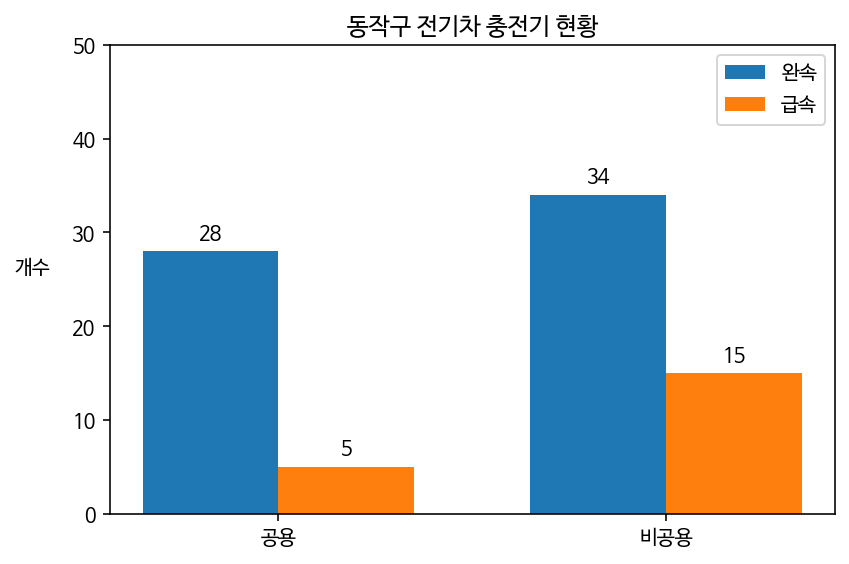

In [34]:
plot_bar(dongjak_full_d, dongjak_fast_d, '동작구 전기차 충전기 현황', 0, 60, 10)

In [35]:
d = collections.OrderedDict(sorted(dongjak_dict_public_full.items()))
dongjak_dict_public_full_sorted = {}
for k, v in d.items():
  dongjak_dict_public_full_sorted[k] = v

In [36]:
d = collections.OrderedDict(sorted(dongjak_dict_public_fast.items()))
dongjak_dict_public_fast_sorted = {}
for k, v in d.items():
  dongjak_dict_public_fast_sorted[k] = v

In [37]:
dongjak_dict_public_fast_sorted

{'노량진동': 1, '대방동': 1, '동작동': 1, '사당동': 1, '상도동': 1, '신대방동': 0, '흑석동': 0}

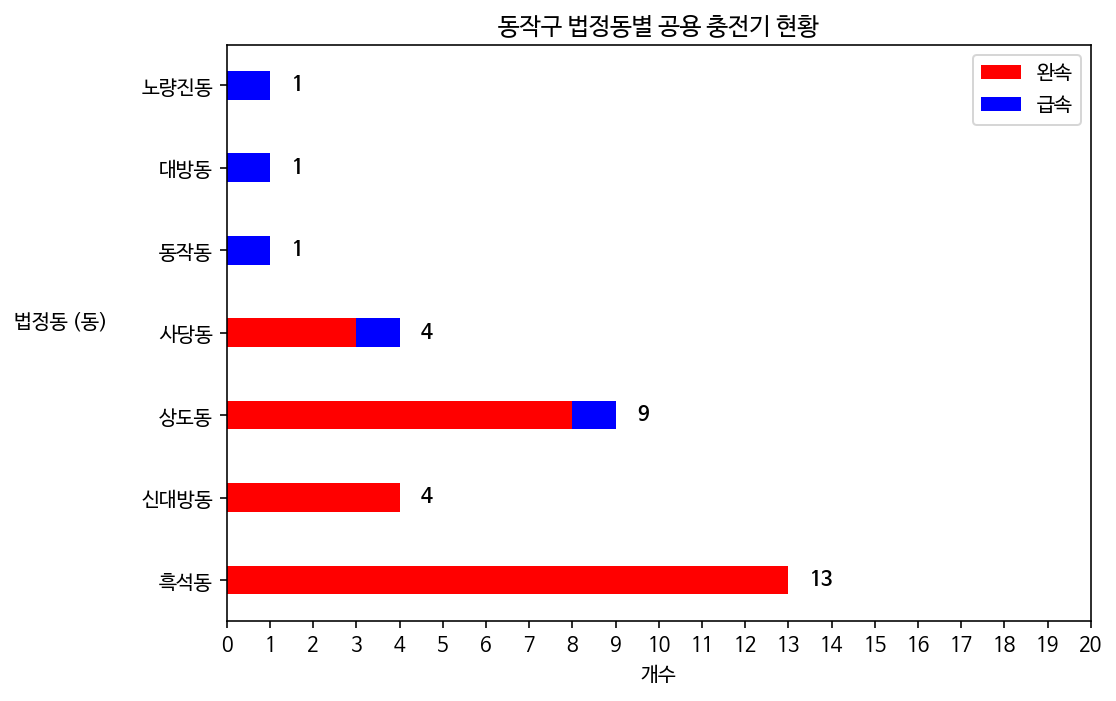

In [38]:
N = 7
menMeans = list(dongjak_dict_public_full_sorted.values())
womenMeans = list(dongjak_dict_public_fast_sorted.values())
ind = np.arange(N)
width = 0.35
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.barh(ind, menMeans, width, color='r')
plt.barh(ind, womenMeans, width, left=menMeans, color='b')
plt.yticks(ind, ('노량진동', '대방동', '동작동', '사당동', '상도동', '신대방동', '흑석동'))
plt.xlabel('개수')
plt.ylabel('법정동 (동)', rotation = 0, labelpad=40)
plt.xticks(np.arange(0, 21, 1))
plt.title('동작구 법정동별 공용 충전기 현황')
ax.invert_yaxis()
ax.legend(labels=['완속', '급속'])

rects = ax.patches 
dd = [] 
for rect in rects: 
  dd.append(rect.get_width())
width_sum = [sum(x) for x in zip(dd[:7], dd[7:])]
y = width_sum
for i, v in enumerate(y):
    ax.text(v + 0.5, i + .05, str(v), fontweight='bold')
plt.show() # 상도1동 및 본동 0 제외

In [39]:
dongjak_dict_public_full_sorted

{'노량진동': 0, '대방동': 0, '동작동': 0, '사당동': 3, '상도동': 8, '신대방동': 4, '흑석동': 13}

In [40]:
dongjak_dict_public_fast_sorted

{'노량진동': 1, '대방동': 1, '동작동': 1, '사당동': 1, '상도동': 1, '신대방동': 0, '흑석동': 0}

In [41]:
df_dongjak_dist = pd.read_csv('/content/drive/My Drive/Colab Notebooks/시각화_및_모델링/동작구_연도별_연료_데이터_정제본.csv')
df_dongjak_dist = df_dongjak_dist.drop(df_dongjak_dist.columns[0], axis=1)
df_dongjak_dist

,연도,동네,휘발유,경유,엘피지,전기,하이브리드,CNG,수소,기타연료
0,2009,노량진동,4564,2473,1226,0,5,10,0,1
1,2009,대방동,5928,2680,1518,0,11,5,0,3
2,2009,동작동,697,373,150,0,1,0,0,0
3,2009,본동,1863,883,434,0,2,0,0,2
4,2009,사당동,15357,6585,3603,0,18,4,0,8
...,...,...,...,...,...,...,...,...,...,...
85,2018,사당동,14703,8923,2076,39,666,18,0,26
86,2018,상도1동,969,673,166,3,44,0,0,1
87,2018,상도동,16817,10760,2582,41,786,19,1,29
88,2018,신대방동,7114,5377,968,20,301,1,0,14


## 3. 동작구 법정동별 상세 확인

In [42]:
import seaborn as sns

In [43]:
uniq_district = list(np.unique(df_dongjak_dist['동네']))
uniq_district

['노량진동', '대방동', '동작동', '본동', '사당동', '상도1동', '상도동', '신대방동', '흑석동']

In [44]:
def plot_yearly2(df, title):
  x_yr = list(df['연도'])
  y = list(df.columns)[1:]

  for type_c in y: 
    zero_list = [] 
    col_val_l = list(df[type_c])
    for item in col_val_l:
      if item == 0: 
        zero_list.append(0)
      else: 
        zero_list.append(np.log(item)) 

    plt.scatter(x_yr, zero_list)
    plt.plot(x_yr, zero_list, label = type_c)

  plt.title(title)
  plt.xlabel("연도")
  plt.ylabel("로그\n개수", rotation = 0, labelpad=20)
  plt.legend(bbox_to_anchor=(1.05, 1.0), loc = 'upper left', title = '연료 종류').get_frame().set_facecolor('none')
  plt.xticks(np.arange(2009, 2019, 1))
  plt.yticks(np.arange(0, 12, 2))
  plt.tight_layout() 
  plt.show() 

In [45]:
temp_whole_df = df_dongjak_dist.groupby(['연도']).sum().reset_index()
temp_whole_df = temp_whole_df[['연도', '휘발유', '경유', '엘피지', 'CNG', '하이브리드', '전기', '수소', '기타연료']]
temp_whole_df

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2009,55372,26430,13620,52,71,0,0,28
1,2010,56099,26778,13468,65,131,0,0,38
2,2011,56490,27164,12748,75,287,3,0,35
3,2012,57497,28343,12198,88,520,4,0,39
4,2013,58422,30214,11718,93,704,5,0,46
5,2014,57801,31846,10825,102,896,6,0,60
6,2015,56835,33951,9994,106,1089,22,0,70
7,2016,57212,35867,9338,99,1549,28,0,83
8,2017,57126,36520,8846,84,2101,73,0,87
9,2018,57443,36753,8237,79,2697,157,1,109


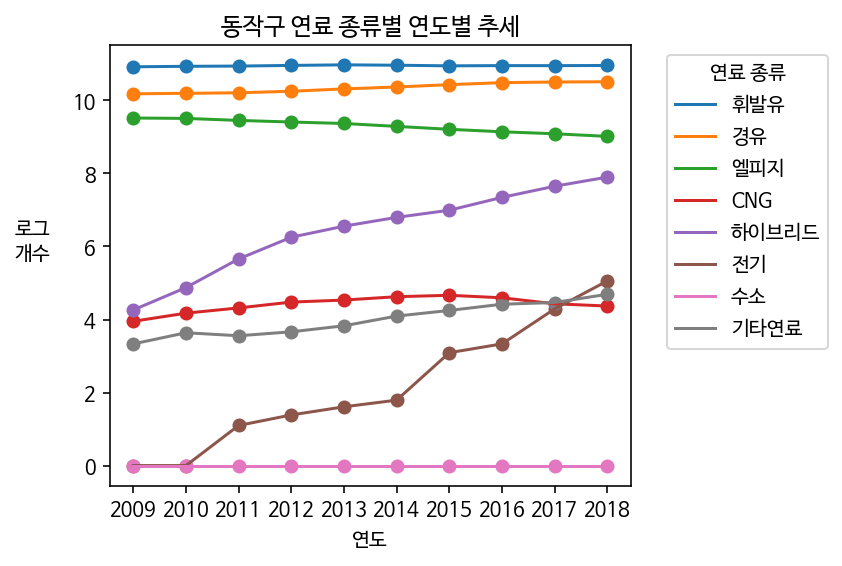

In [46]:
plot_yearly2(temp_whole_df, '동작구 연료 종류별 연도별 추세')

In [47]:
uniq_district

['노량진동', '대방동', '동작동', '본동', '사당동', '상도1동', '상도동', '신대방동', '흑석동']

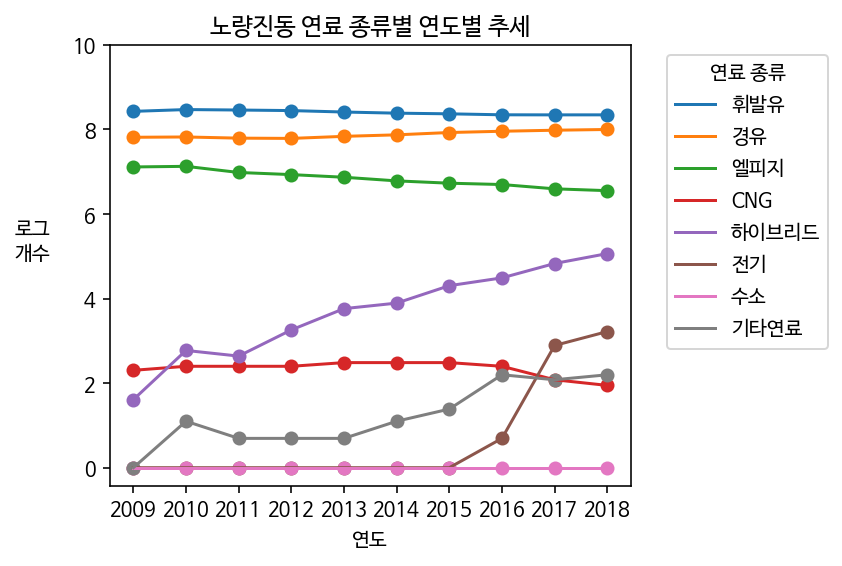

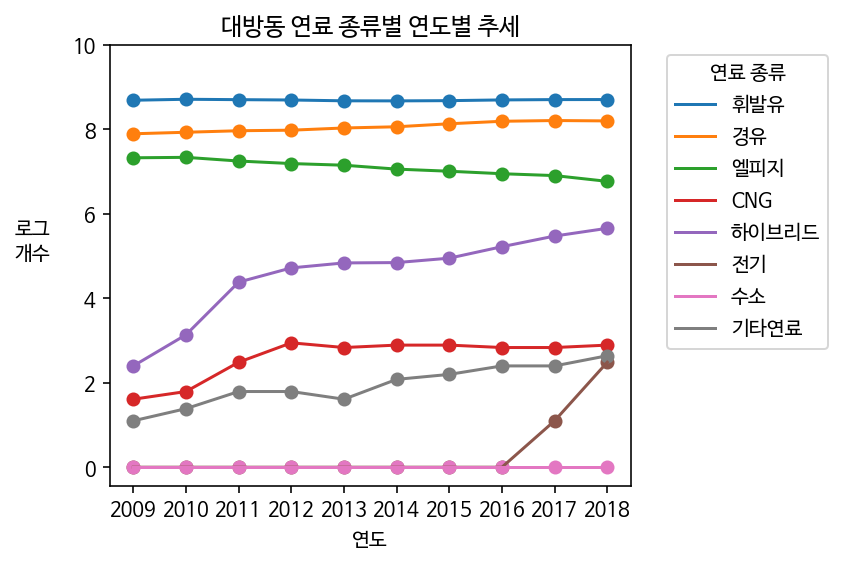

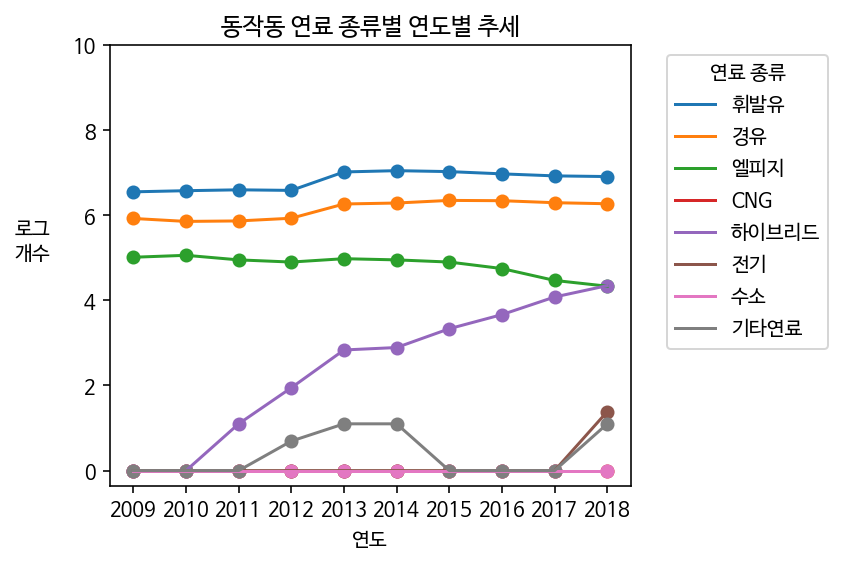

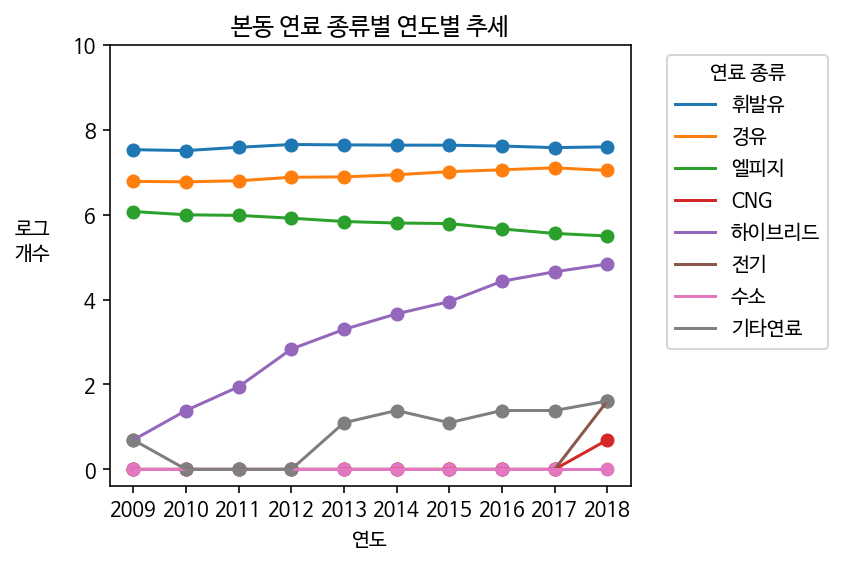

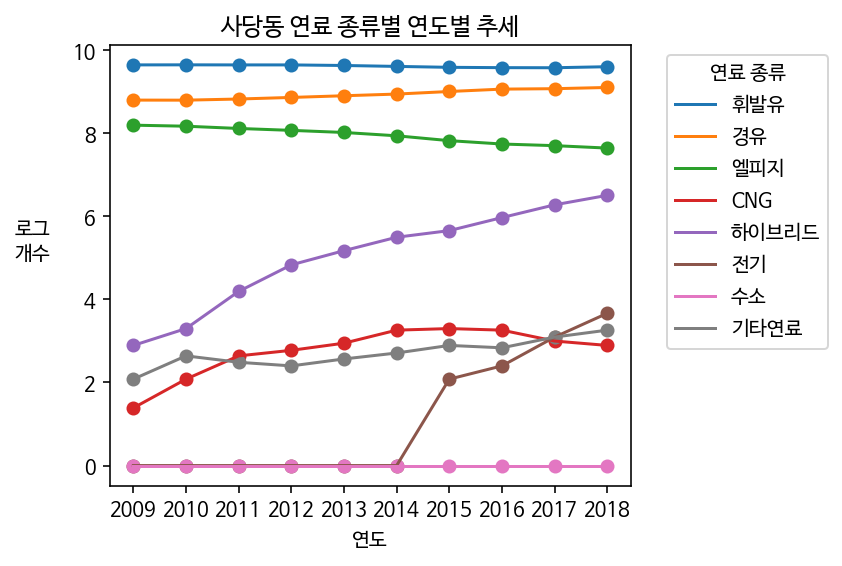

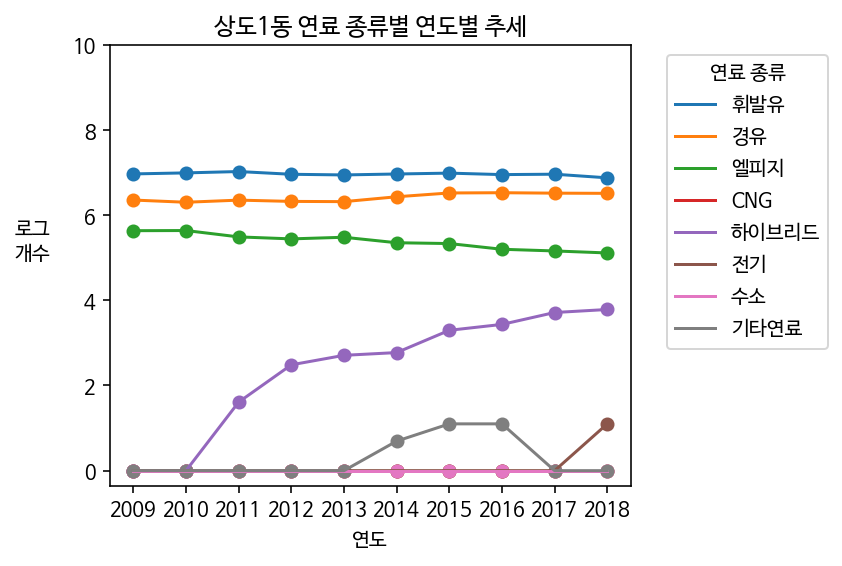

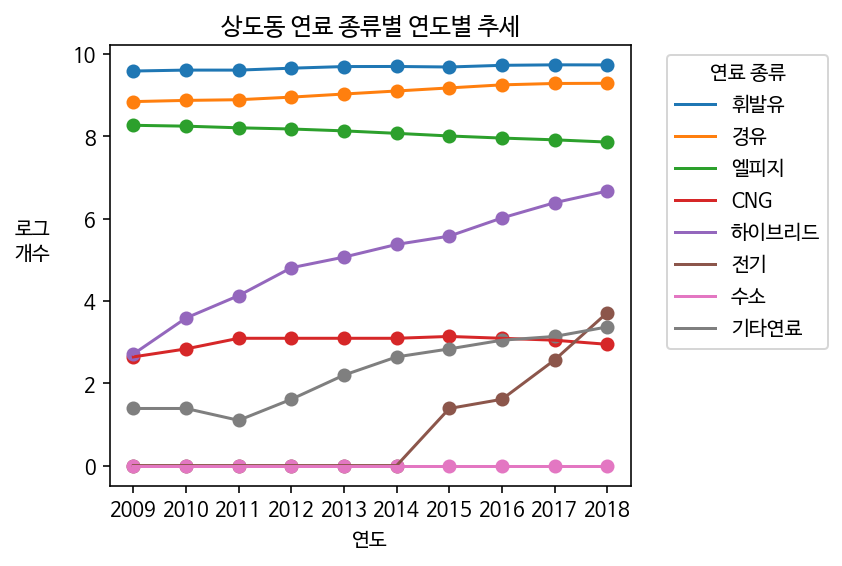

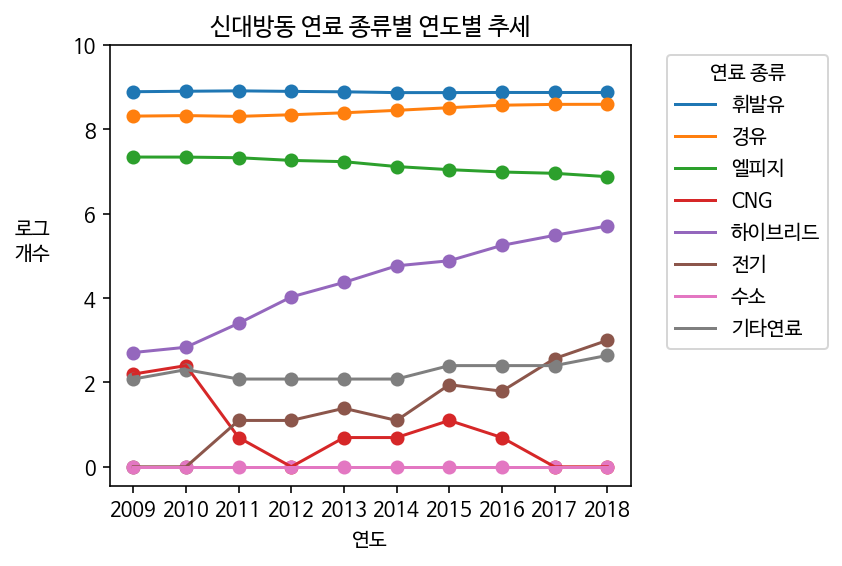

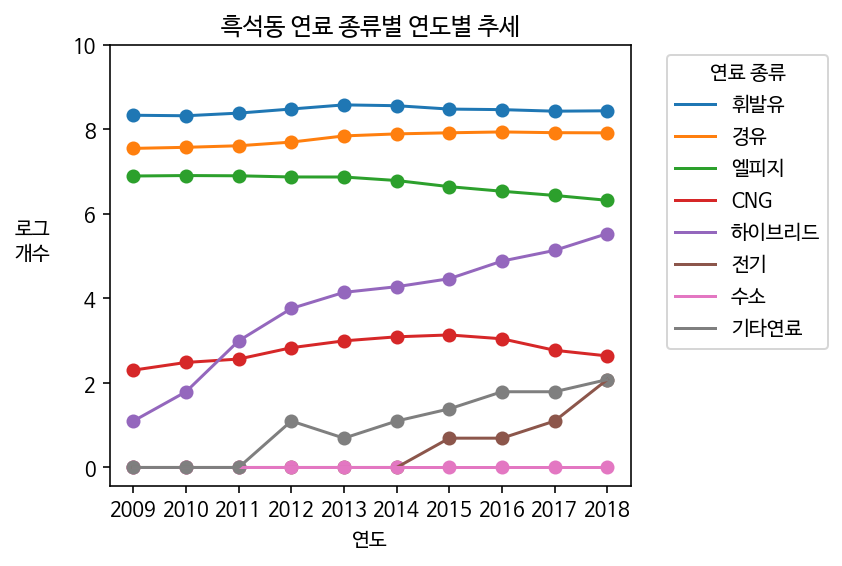

In [48]:
for district in uniq_district: 
  df = df_dongjak_dist[df_dongjak_dist['동네'] == district]
  df = df[['연도', '동네', '휘발유', '경유', '엘피지', 'CNG', '하이브리드', '전기', '수소', '기타연료']]
  df = df.drop(df.columns[1], axis = 1)
  plot_yearly2(df, district + ' 연료 종류별 연도별 추세')

## 4. 수요 예측

In [49]:
yearly_df_seoul

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2015,1602528,1066199,338455,9992,33927,1151,1,4335
1,2016,1596819,1107727,317469,9854,44875,1498,12,4753
2,2017,1600270,1135239,301546,9731,59431,4797,13,5229
3,2018,1592471,1147787,284328,9635,75178,9564,84,5604
4,2019,1607915,1121920,271977,9441,91505,14952,599,5848


In [50]:
# https://m.post.naver.com/viewer/postView.nhn?volumeNo=19119382&memberNo=3251907

In [51]:
yearly_df_seoul

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2015,1602528,1066199,338455,9992,33927,1151,1,4335
1,2016,1596819,1107727,317469,9854,44875,1498,12,4753
2,2017,1600270,1135239,301546,9731,59431,4797,13,5229
3,2018,1592471,1147787,284328,9635,75178,9564,84,5604
4,2019,1607915,1121920,271977,9441,91505,14952,599,5848


In [52]:
yearly_df_dongjak

,연도,휘발유,경유,엘피지,CNG,하이브리드,전기,수소,기타연료
0,2009,55372,26430,13620,52,71,0,0,28
1,2010,56099,26778,13468,65,131,0,0,38
2,2011,56490,27164,12748,75,287,3,0,35
3,2012,57497,28343,12198,88,520,4,0,39
4,2013,58422,30214,11718,93,704,5,0,46
5,2014,57801,31846,10825,102,896,6,0,60
6,2015,56835,33951,9994,106,1089,22,0,70
7,2016,57212,35867,9338,99,1549,28,0,83
8,2017,57126,36520,8846,84,2101,73,0,87
9,2018,57443,36753,8237,79,2697,157,1,109


In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

def lr_optimizer_viz(df, car_type):
  x_train = df['연도'].values.reshape(-1,1)
  y_train = df[car_type].values.reshape(-1,1)
  x_test = np.array(2020).reshape(-1, 1)

  for i in range(1, 6):
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x_train)
    lr2 = LinearRegression()
    lr2.fit(x_poly, y_train)
    ypred = lr2.predict(x_poly)

    plt.scatter(x_train, y_train, color = 'red')
    plt.plot(x_train, ypred, color = 'blue')
    #plt.title('Salary vs Experience (Training set)')
    #plt.xlabel('Years of Experience')
    #plt.ylabel('Salary')
    plt.show()

    print('Mean squared error: %.2f' % mean_squared_error(y_train, ypred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.4f'% r2_score(y_train, ypred))

    print('2020 개수: ' + str(int(lr2.predict(polynomial_features.fit_transform(x_test)))))


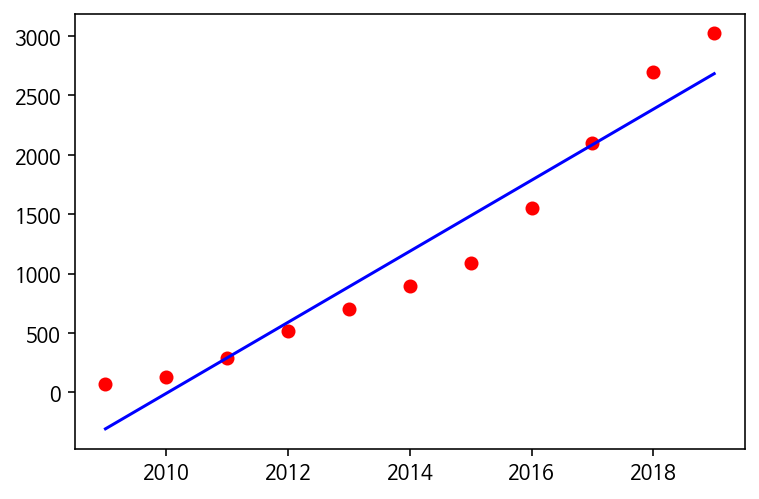

Mean squared error: 64938.83
Coefficient of determination: 0.9323
2020 개수: 2982


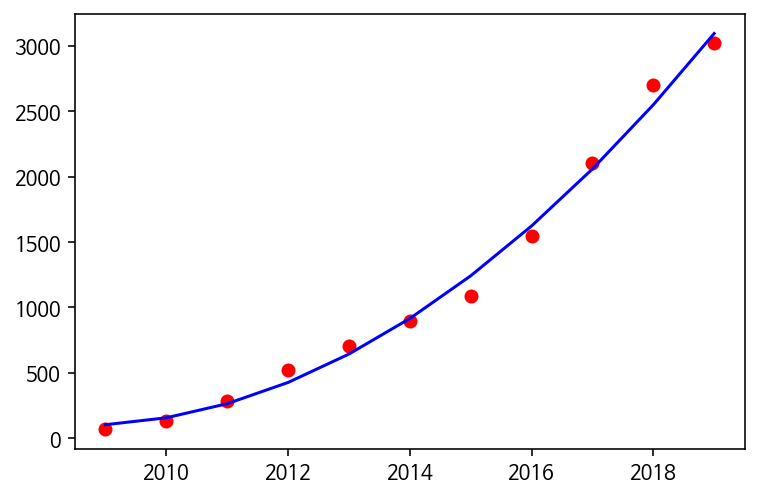

Mean squared error: 6604.51
Coefficient of determination: 0.9931
2020 개수: 3693


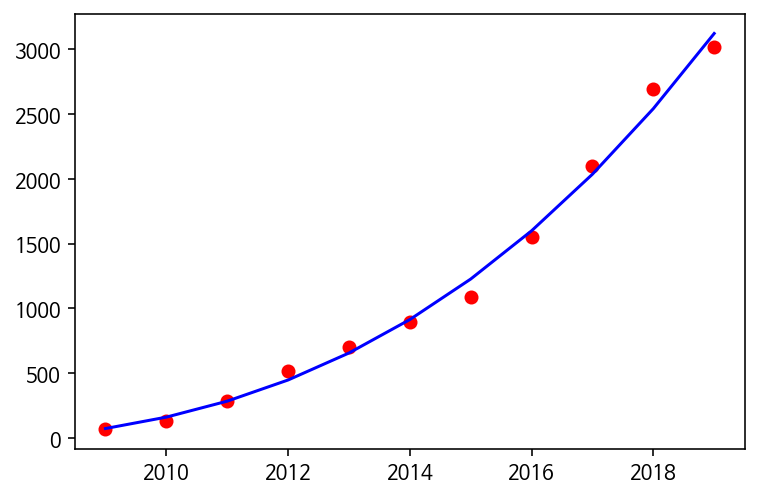

Mean squared error: 6236.20
Coefficient of determination: 0.9935
2020 개수: 3782


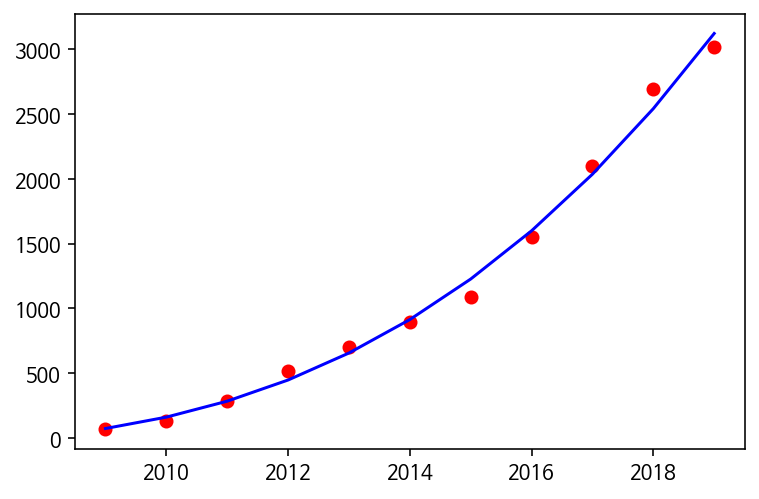

Mean squared error: 6237.67
Coefficient of determination: 0.9935
2020 개수: 3782


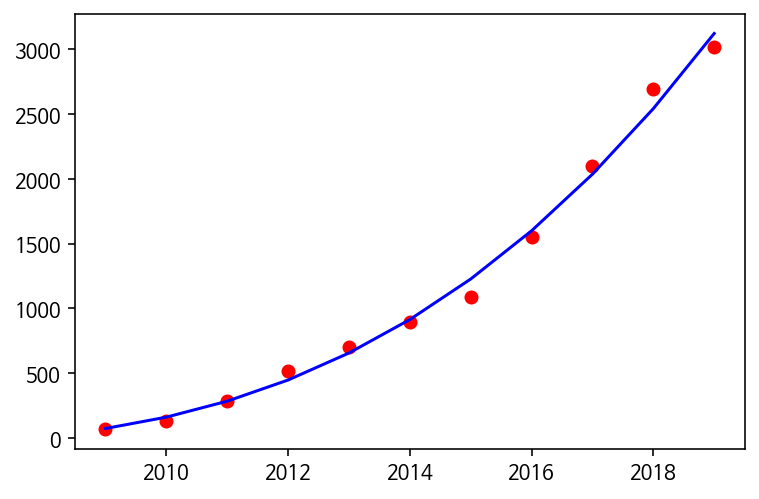

Mean squared error: 6239.12
Coefficient of determination: 0.9935
2020 개수: 3782


In [54]:
lr_optimizer_viz(yearly_df_dongjak, '하이브리드')

In [55]:
def lr_optim(df, car_type, seoul_dongjak):
  x_train = df['연도'].values.reshape(-1,1)
  y_train = df[car_type].values.reshape(-1,1)
  x_test = np.array(2020).reshape(-1, 1)

  for i in range(1, 3, 1):
    polynomial_features = PolynomialFeatures(degree=i)
    x_poly = polynomial_features.fit_transform(x_train)
    lr2 = LinearRegression()
    lr2.fit(x_poly, y_train)
    ypred = lr2.predict(x_poly)

    #ax.set_xticklabels(tick_labels.astype(int))
    plt.scatter(x_train, y_train, color = 'red')
    plt.plot(x_train, ypred, color = 'blue')
    plt.xticks(np.arange(min(df['연도']), max(df['연도'])+1, 2))
    if i == 1:
      plt.title(seoul_dongjak + ' ' + car_type + ' 단순 선형 회귀 분석 결과')
    else: 
      plt.title(seoul_dongjak + ' ' + car_type + ' 다중 선형 회귀 분석 결과')
    plt.xlabel('연도')
    plt.ylabel('개수', rotation=0, labelpad = 20)
    plt.show()

    coef_l = [float(item) for item in lr2.coef_.tolist()[0]]
    if i == 1: 
      print('y_hat = ' + str(round(float(lr2.intercept_), 2)) + ' + ' + str(round(coef_l[1], 2)) + ' * X')
    else: 
      print('y_hat = ' + str(round(float(lr2.intercept_), 2)) + ' + ' + str(round(coef_l[1], 2)) + ' * X + ' +  str(round(coef_l[2], 2)) + ' * X^2')

    print('Mean squared error: %.2f' % mean_squared_error(y_train, ypred))
    # The coefficient of determination: 1 is perfect prediction
    print('Coefficient of determination: %.4f'% r2_score(y_train, ypred))

    print('2020 개수: ' + str(int(lr2.predict(polynomial_features.fit_transform(x_test)))))

In [56]:
import warnings
warnings.filterwarnings('ignore')

In [57]:
yearly_df_seoul['연도']

0    2015
1    2016
2    2017
3    2018
4    2019
Name: 연도, dtype: int64

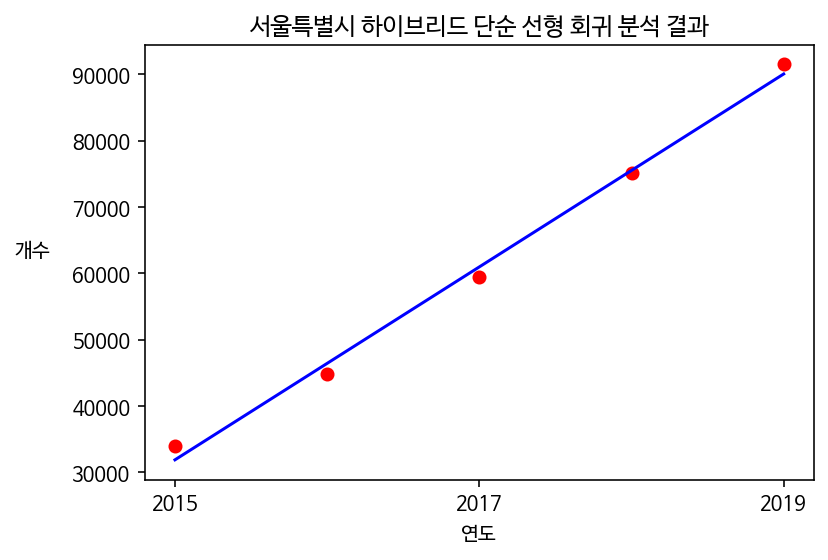

y_hat = -29278097.1 + 14545.9 * X
Mean squared error: 2232388.94
Coefficient of determination: 0.9948
2020 개수: 104620


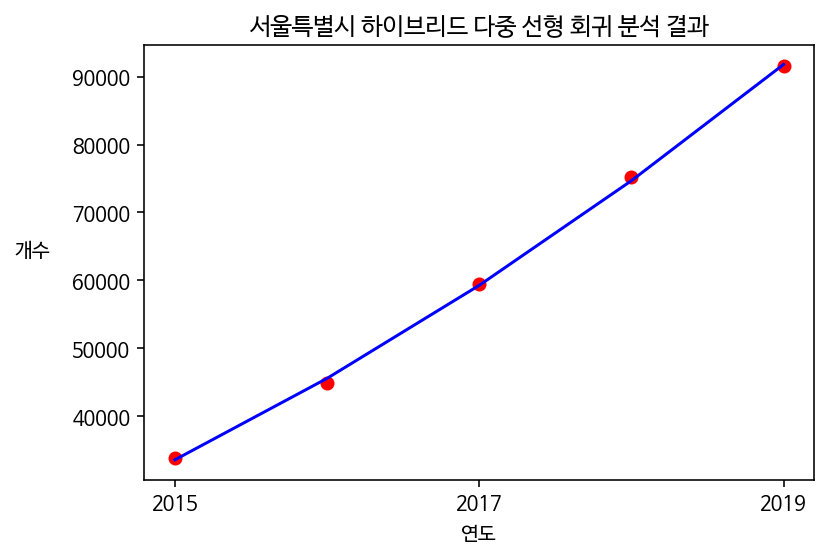

y_hat = 3443004853.24 + -3428473.1 * X + 853.5 * X^2
Mean squared error: 192694.64
Coefficient of determination: 0.9995
2020 개수: 110595


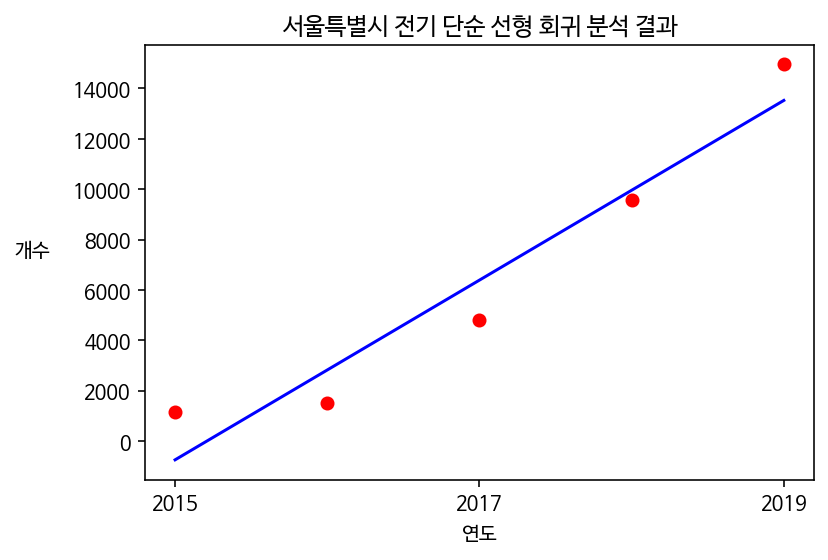

y_hat = -7187843.2 + 3566.8 * X
Mean squared error: 2015580.56
Coefficient of determination: 0.9266
2020 개수: 17092


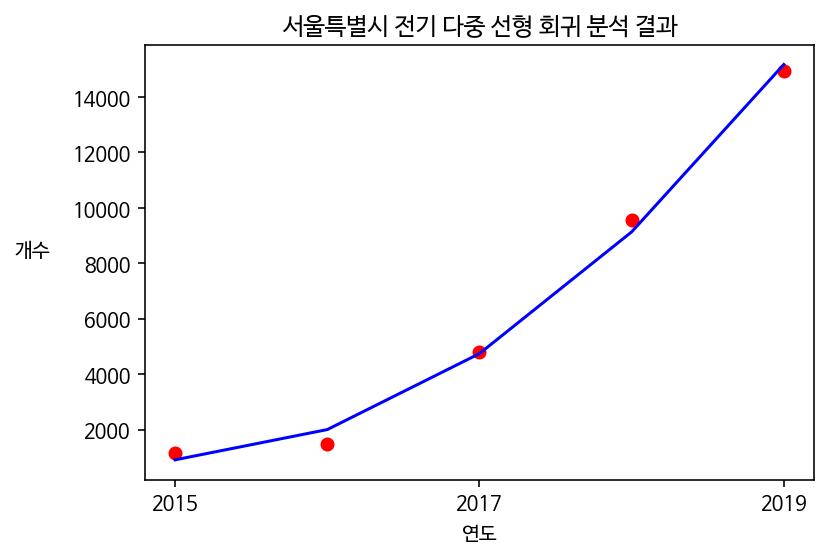

y_hat = 3349148927.53 + -3324483.2 * X + 825.0 * X^2
Mean squared error: 109830.56
Coefficient of determination: 0.9960
2020 개수: 22867


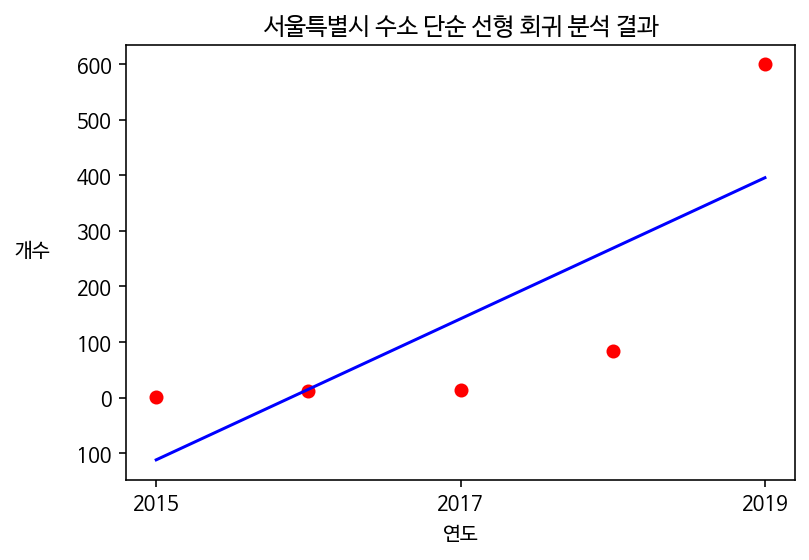

y_hat = -255613.8 + 126.8 * X
Mean squared error: 20970.48
Coefficient of determination: 0.6053
2020 개수: 522


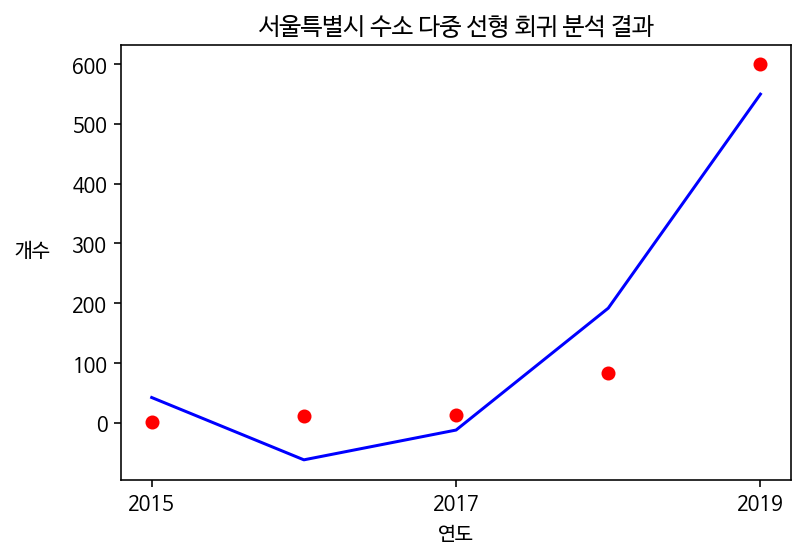

y_hat = 313002484.61 + -310491.2 * X + 77.0 * X^2
Mean squared error: 4369.28
Coefficient of determination: 0.9178
2020 개수: 1061


In [59]:
for car_type in ['하이브리드', '전기', '수소']: 
  lr_optim(yearly_df_seoul, car_type, '서울특별시')

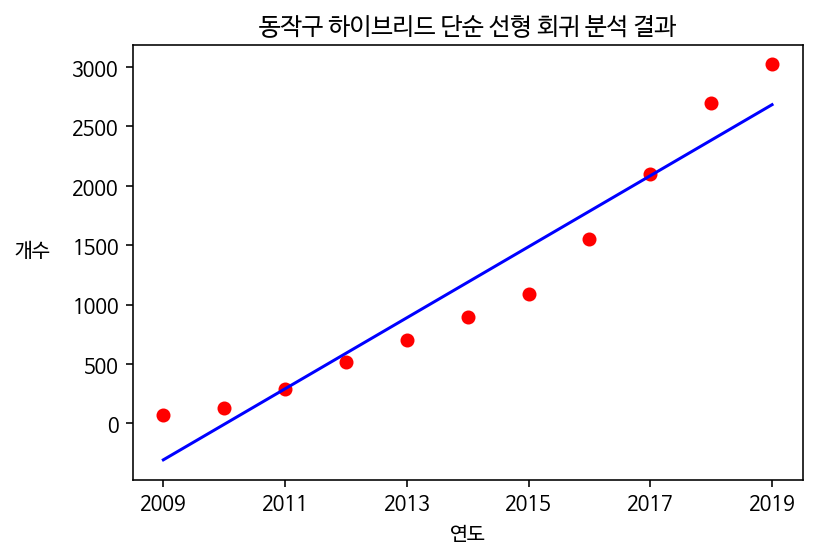

y_hat = -601254.42 + 299.13 * X
Mean squared error: 64938.83
Coefficient of determination: 0.9323
2020 개수: 2982


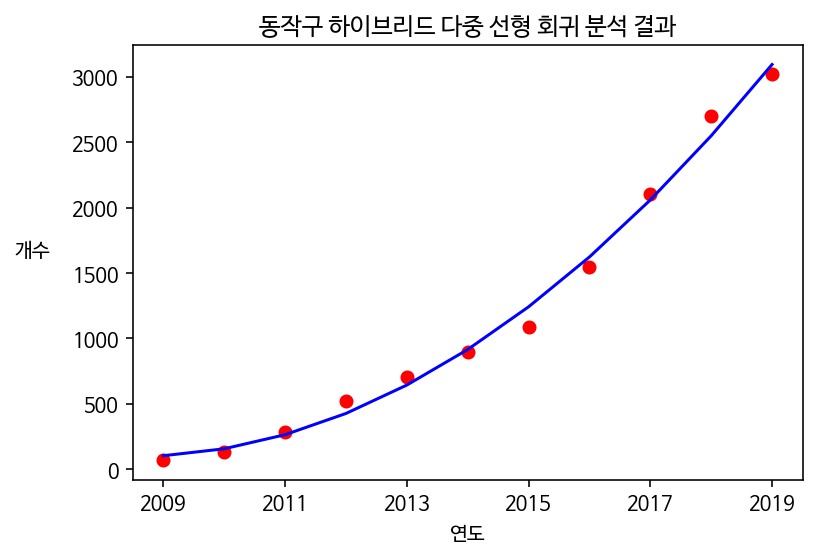

y_hat = 110324559.49 + -109855.88 * X + 27.35 * X^2
Mean squared error: 6604.51
Coefficient of determination: 0.9931
2020 개수: 3693


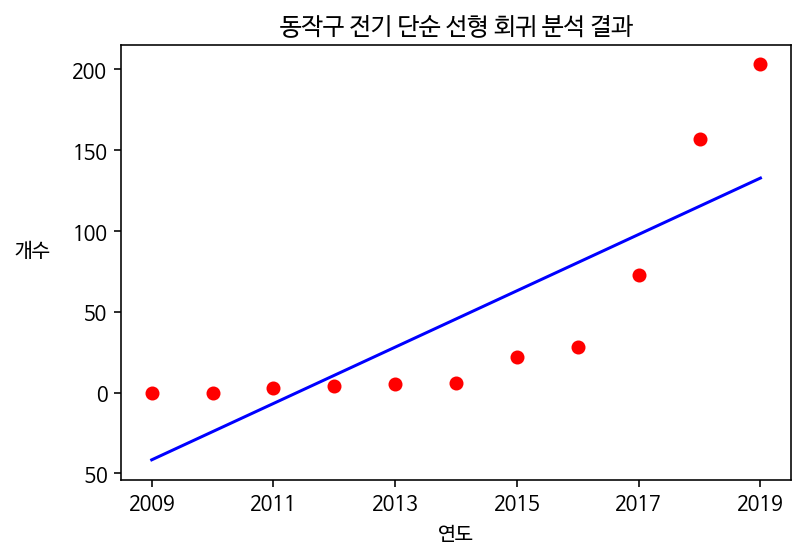

y_hat = -35071.29 + 17.44 * X
Mean squared error: 1479.98
Coefficient of determination: 0.6726
2020 개수: 150


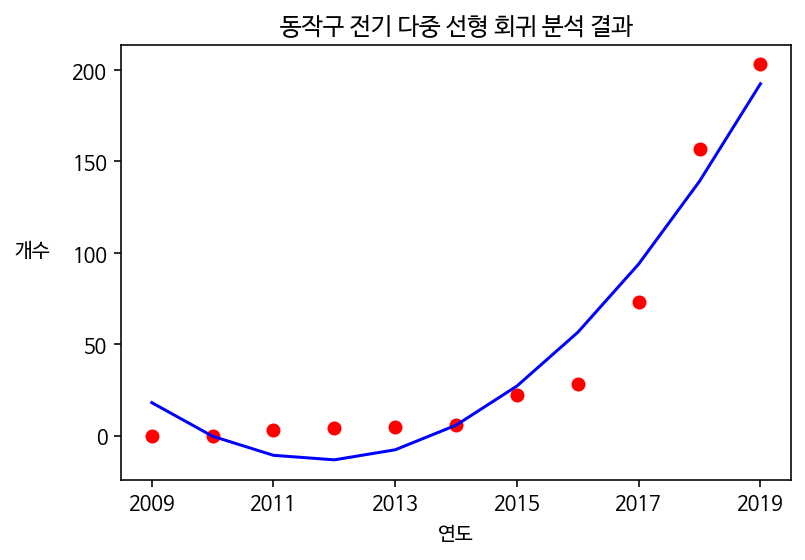

y_hat = 16114032.88 + -16019.45 * X + 3.98 * X^2
Mean squared error: 243.59
Coefficient of determination: 0.9461
2020 개수: 253


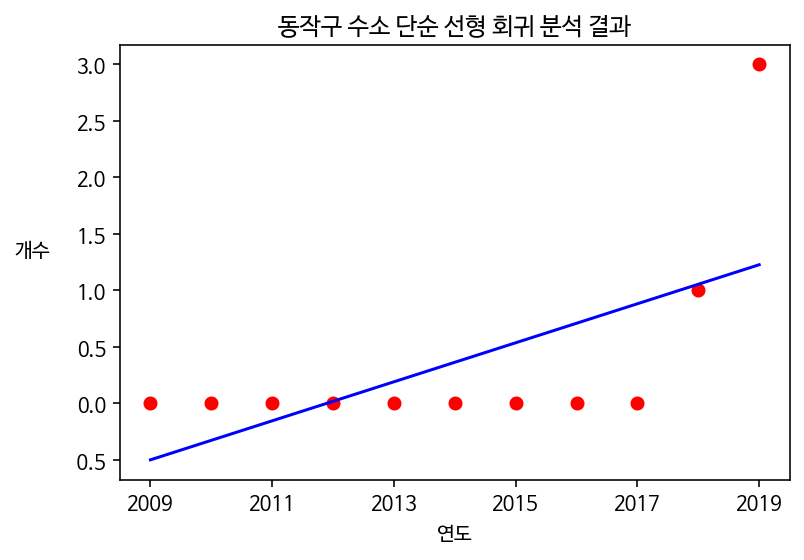

y_hat = -347.51 + 0.17 * X
Mean squared error: 0.48
Coefficient of determination: 0.3840
2020 개수: 1


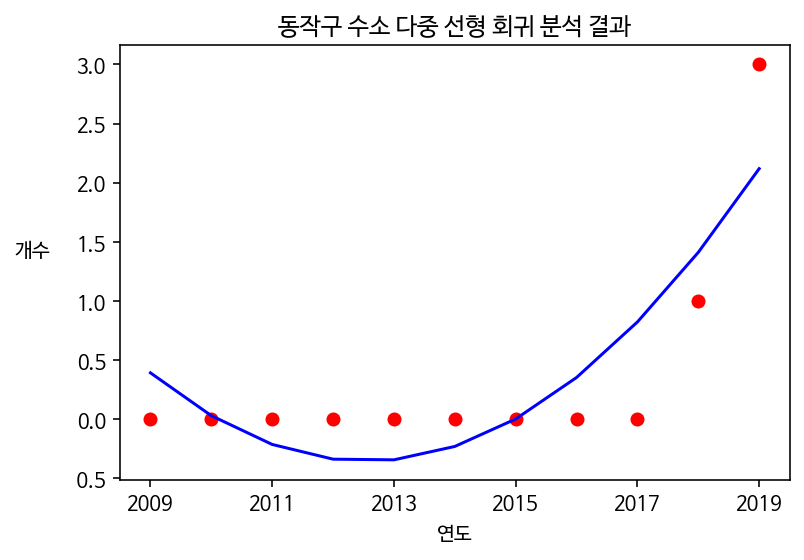

y_hat = 240754.46 + -239.25 * X + 0.06 * X^2
Mean squared error: 0.20
Coefficient of determination: 0.7388
2020 개수: 2


In [58]:
for car_type in ['하이브리드', '전기', '수소']: 
  lr_optim(yearly_df_dongjak, car_type, '동작구')